# Eloring Data

In [2]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Filtering Warnings
warnings.filterwarnings('ignore')

#Importing machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#Reading CSV files into DataFrames
df = pd.read_csv("EyeT/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_0.csv")
df_1 = pd.read_csv("EyeT/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_1.csv")
df_questionnaire_1 = pd.read_csv("Questionnaire_datasetIA.csv",encoding='latin-1')

In [4]:
#Printing the shape of the DataFrame
print( df.shape)
#Comparing columns of two DataFrames
list(df.columns) == list(df_1.columns)

(7466, 71)


True

In [5]:
#Displaying the first 5 rows of the DataFrame
df.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN


In [6]:
# Check for null values.
for i in df.columns:
    print(i,":",df[i].isnull().sum()/df.shape[0]*100)

Unnamed: 0 : 0.0
Recording timestamp : 0.0
Computer timestamp : 0.0
Sensor : 0.05357621216180017
Project name : 0.0
Export date : 0.0
Participant name : 0.0
Recording name : 0.0
Recording date : 0.0
Recording date UTC : 0.0
Recording start time : 0.0
Recording start time UTC : 0.0
Recording duration : 0.0
Timeline name : 0.0
Recording Fixation filter name : 0.0
Recording software version : 0.0
Recording resolution height : 0.0
Recording resolution width : 0.0
Recording monitor latency : 0.0
Eyetracker timestamp : 3.549424055719261
Event : 99.9464237878382
Event value : 99.95981784087866
Gaze point X : 8.665952317171175
Gaze point Y : 8.665952317171175
Gaze point left X : 11.358156978301635
Gaze point left Y : 11.358156978301635
Gaze point right X : 13.31368872220734
Gaze point right Y : 13.31368872220734
Gaze direction left X : 11.358156978301635
Gaze direction left Y : 11.358156978301635
Gaze direction left Z : 11.358156978301635
Gaze direction right X : 13.31368872220734
Gaze directi

In [7]:
#check for Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7466 entries, 0 to 7465
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           7466 non-null   int64  
 1   Recording timestamp                  7466 non-null   int64  
 2   Computer timestamp                   7466 non-null   int64  
 3   Sensor                               7462 non-null   object 
 4   Project name                         7466 non-null   object 
 5   Export date                          7466 non-null   object 
 6   Participant name                     7466 non-null   object 
 7   Recording name                       7466 non-null   object 
 8   Recording date                       7466 non-null   object 
 9   Recording date UTC                   7466 non-null   object 
 10  Recording start time                 7466 non-null   object 
 11  Recording start time UTC      

In [8]:
df_questionnaire_1.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,...,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,...,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,...,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2,3,4,3,...,2,3,4,4,2,4,2,114,96,8 minutes 39 seconds
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3,3,4,4,...,1,4,2,1,4,4,4,138,106,7 minutes 27 seconds


In [9]:
df.describe()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,7466.000000,7.466000e+03,7.466000e+03,7466.0,7466.0,7466.0,7.201000e+03,6819.000000,6819.000000,6618.000000,...,7462.0,7462.0,7462.0,7462.0,7465.000000,7465.000000,3959.000000,3959.000000,261.000000,261.000000
mean,6814.500000,5.397491e+07,5.426480e+08,83579.0,1080.0,1920.0,5.398770e+08,1070.355771,253.597742,1034.763373,...,214.0,0.0,897.0,649.0,166.684796,300.552981,1076.629199,210.200556,-803.107280,410.467433
std,2155.392888,1.781100e+07,1.781100e+07,0.0,0.0,0.0,1.732172e+07,273.425806,293.880068,273.195637,...,0.0,0.0,0.0,0.0,216.165831,223.675681,267.885113,290.363388,117.803013,284.483371
min,3082.000000,2.341932e+07,5.120924e+08,83579.0,1080.0,1920.0,5.098806e+08,280.000000,-201.000000,280.000000,...,214.0,0.0,897.0,649.0,8.000000,15.000000,477.000000,-164.000000,-1033.000000,-8.000000
25%,4948.250000,3.849367e+07,5.271667e+08,83579.0,1080.0,1920.0,5.248790e+08,903.000000,-4.000000,866.000000,...,214.0,0.0,897.0,649.0,42.000000,125.000000,894.000000,-94.000000,-869.000000,193.000000
50%,6814.500000,5.404436e+07,5.427174e+08,83579.0,1080.0,1920.0,5.398772e+08,1024.000000,263.000000,992.000000,...,214.0,0.0,897.0,649.0,92.000000,220.000000,1005.000000,228.000000,-842.000000,381.000000
75%,8680.750000,6.959513e+07,5.582682e+08,83579.0,1080.0,1920.0,5.548755e+08,1338.000000,401.000000,1307.000000,...,214.0,0.0,897.0,649.0,192.000000,447.000000,1354.000000,386.000000,-756.000000,639.000000
max,10547.000000,8.343446e+07,5.721075e+08,83579.0,1080.0,1920.0,5.698706e+08,1610.000000,1869.000000,1576.000000,...,214.0,0.0,897.0,649.0,1242.000000,885.000000,1559.000000,999.000000,-501.000000,1036.000000


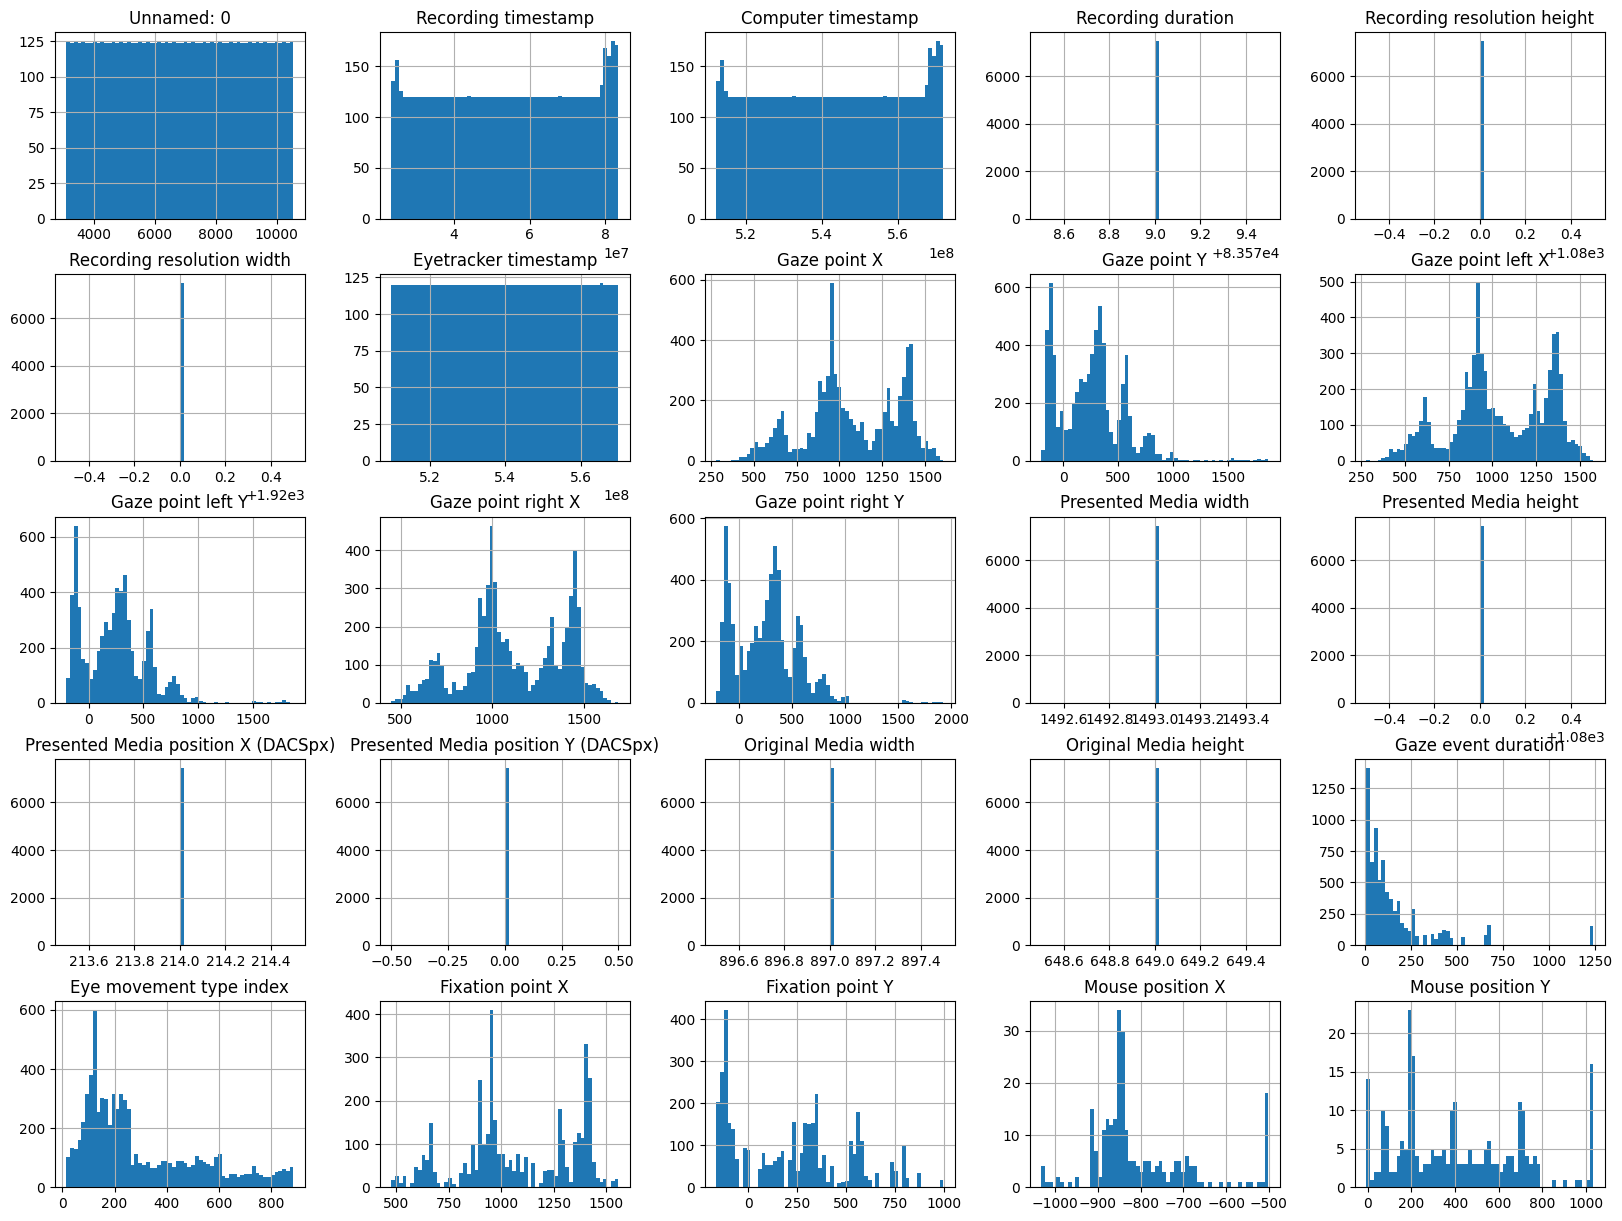

In [10]:
#Creating histogram plots for the columns in the DataFrame
df.hist(bins=60, figsize=(20, 15));

# Data Pre-procesing
* some of the columns that may not be necessary for model training.
   * Unnamed: 0: This appears to be an index column and is not relevant for the analysis.
   * Sensor: This column may not be relevant for the model as it is not clear what kind of sensor it is.
   * Project name, Export date, Participant name, Recording name, Recording date, Recording date UTC, Recording start time, Recording start time UTC, Recording duration, Timeline name, Recording Fixation filter name, Recording software version: These columns may not be directly related to the gaze behavior and may not be necessary for model training.
   * Recording resolution height, Recording resolution width, Recording monitor latency: These columns may not be directly related to the gaze behavior beacuse their std is zero and may not be necessary for model training.
   * Event and Event value: These columns may not be relevant for predicting gaze behavior.
   * Presented Stimulus name, Presented Media name: These columns may not be necessary for predicting gaze behavior unless the stimuli or media presented to the participant is of interest.
   * Eye movement type, Eye movement type index: These columns may not be relevant for predicting gaze behavior as they describe the type of eye movement rather than the gaze behavior itself.
   * validity left and validity right: keeping data which are assigned to be valid. droping remaining values.
   * Mouse position X, Mouse position Y: These columns may not be necessary for predicting gaze behavior as the focus is on the gaze behavior and not the mouse behavior and it has 98% NaN values.
* replace all the , to . in the number values.
* One commonly used method for filling missing values in time series is to use interpolation, which can help preserve the underlying patterns and trends in the data.

In [11]:
def preprocess_data(data):
    """
    Preprocesses eye-tracking data by dropping unnecessary columns,
    filtering valid data, converting data types, interpolating missing values,
    and renaming columns.

    Args:
        data (DataFrame): Input eye-tracking data as a Pandas DataFrame.

    Returns:
        DataFrame: Preprocessed eye-tracking data as a Pandas DataFrame.
    """
    columns_dropped =['Unnamed: 0','Sensor','Project name', 'Export date', 'Recording name', 'Recording date',
                  'Recording date UTC','Recording start time', 'Recording start time UTC', 'Recording duration', 'Timeline name',
                  'Recording Fixation filter name','Recording software version','Recording resolution height', 'Recording resolution width',
                  'Recording monitor latency','Event', 'Event value','Presented Stimulus name', 'Presented Media name','Eye movement type',
                  'Eye movement type index','Mouse position X', 'Mouse position Y']

    # drop the columns
    df_preprocessed = data.drop(columns=columns_dropped)

    # keeping data which are assigned to be valid. dropping remaining values
    df_preprocessed = df_preprocessed[(df_preprocessed['Validity left'] == 'Valid') & (df_preprocessed['Validity right'] == 'Valid')]
    df_preprocessed.drop(columns=['Validity left', 'Validity right'], inplace=True)
    
    # replacing all commas to dots in the number values
    df_preprocessed = df_preprocessed.replace(to_replace=r',', value='.', regex=True)

    columns_to_convert = ['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 
                          'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right', 
                          'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 
                          'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 
                          'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 
                          'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 
                          'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 
                          'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']
    
    # converting selected columns to float data type
    df_preprocessed[columns_to_convert] = df_preprocessed[columns_to_convert].astype(float)

    # linear interpolation
    df_interpolated = df_preprocessed.interpolate(method='linear', limit_direction='forward')

    # filling remaining NaN values with forward fill method
    df_preprocessed = df_interpolated.fillna(method='ffill')

    # dropping rows with NaN values in 'Pupil diameter left' and 'Pupil diameter right' columns
    df_preprocessed.dropna(subset=['Pupil diameter left', 'Pupil diameter right'], inplace=True)
    
    # Convert 'Participant name' column to integer and rename it to 'Participant nr'
    df_preprocessed['Participant name'] = df_preprocessed['Participant name'].str[-2:].astype(int)
    df_preprocessed.rename(columns={'Participant name': 'Participant nr'}, inplace=True)
    
    return df_preprocessed

In [12]:
# Call the preprocess_data() function to preprocess the data
df_preprocessed = preprocess_data(df)


In [13]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6269 entries, 4 to 7463
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Recording timestamp                  6269 non-null   int64  
 1   Computer timestamp                   6269 non-null   int64  
 2   Participant nr                       6269 non-null   int32  
 3   Eyetracker timestamp                 6269 non-null   float64
 4   Gaze point X                         6269 non-null   float64
 5   Gaze point Y                         6269 non-null   float64
 6   Gaze point left X                    6269 non-null   float64
 7   Gaze point left Y                    6269 non-null   float64
 8   Gaze point right X                   6269 non-null   float64
 9   Gaze point right Y                   6269 non-null   float64
 10  Gaze direction left X                6269 non-null   float64
 11  Gaze direction left Y         

In [14]:
df_preprocessed.head()

,Recording timestamp,Computer timestamp,Participant nr,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,...,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
4,23442782,512115853,1,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,...,1080.0,214.0,0.0,897.0,649.0,117.0,971.0,341.0,0.5073,0.316
5,23451119,512124190,1,509905648.0,972.0,340.0,913.0,287.0,1031.0,393.0,...,1080.0,214.0,0.0,897.0,649.0,117.0,971.0,341.0,0.5073,0.316
6,23459447,512132518,1,509913976.0,970.0,323.0,922.0,292.0,1017.0,354.0,...,1080.0,214.0,0.0,897.0,649.0,117.0,971.0,341.0,0.5073,0.316
7,23467779,512140850,1,509922308.0,977.0,332.0,922.0,292.0,1032.0,371.0,...,1080.0,214.0,0.0,897.0,649.0,117.0,971.0,341.0,0.5073,0.316
8,23476117,512149188,1,509930645.0,975.0,352.0,931.0,452.0,1018.0,253.0,...,1080.0,214.0,0.0,897.0,649.0,117.0,971.0,341.0,0.5073,0.316


Time series Plot

Plotting the time series of "Gaze point X" and "Gaze point Y" for the left eye over a specified time interval (e.g., the first 10 seconds of the recording):

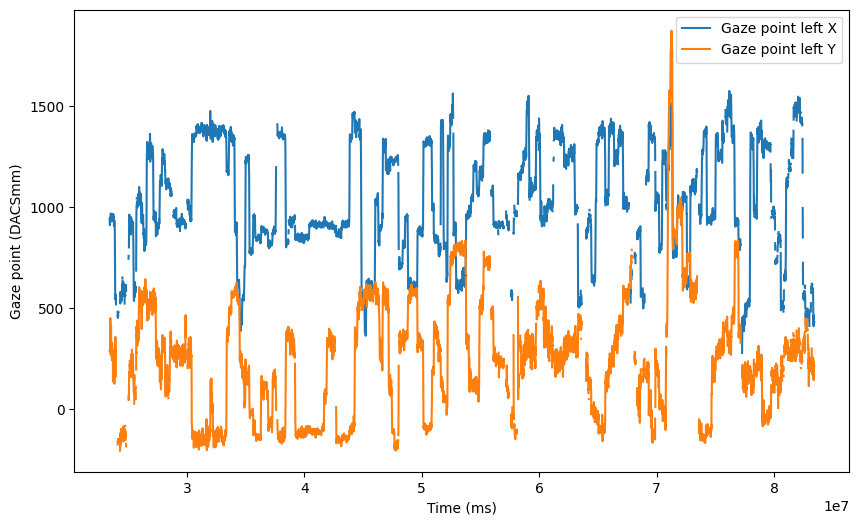

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Recording timestamp'], df['Gaze point left X'], label='Gaze point left X')
ax.plot(df['Recording timestamp'], df['Gaze point left Y'], label='Gaze point left Y')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Gaze point (DACSmm)')
ax.legend()
plt.show()

Plotting the time series of "Gaze event duration" for fixations longer than a certain duration (e.g., 500 ms):

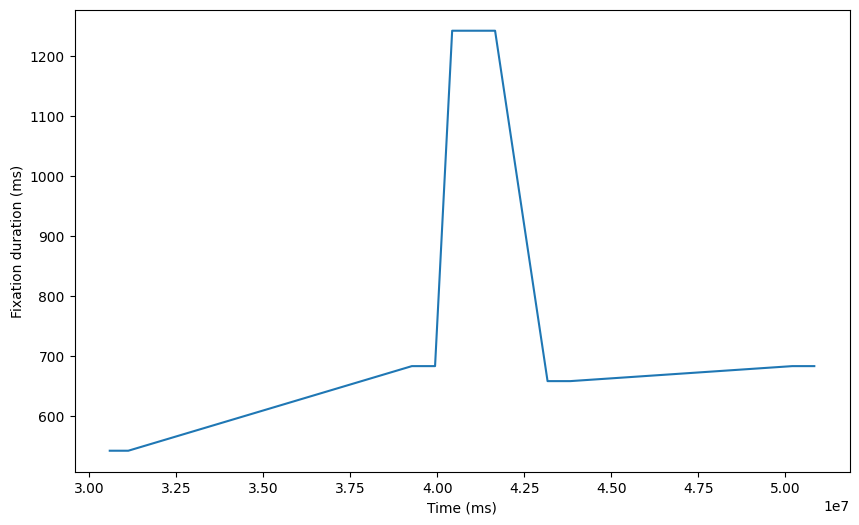

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
mask = df['Gaze event duration'] > 500
ax.plot(df.loc[mask, 'Recording timestamp'], df.loc[mask, 'Gaze event duration'])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Fixation duration (ms)')
plt.show()

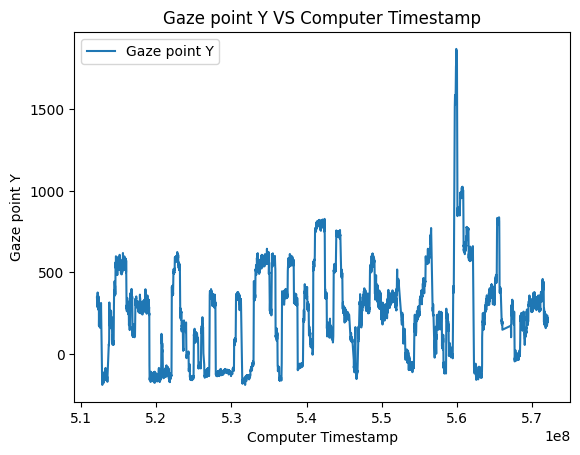

In [17]:
def plot_dataset(df_preprocessed, x="Computer timestamp", y="Gaze point Y"):
    plt.plot( df_preprocessed[x],df_preprocessed[y], label=y)
    plt.title(y + " VS Computer Timestamp")
    plt.xlabel("Computer Timestamp")
    plt.ylabel(y)
    plt.legend()
    plt.rcParams["figure.figsize"] = (8, 6)
    plt.show()
plot_dataset(df_preprocessed)

In [18]:
def plot_timeseries(df):
    """
    Plot time series data from DataFrame using matplotlib.

    Args:
        df (pd.DataFrame): DataFrame containing the data to be plotted.

    Returns:
        None
    """
    data = df_preprocessed
    plt.rcParams["figure.figsize"] = (20, 20)
    df_columns = list(data.columns)[1:]
    fig, axs = plt.subplots(nrows=6, ncols=8)
    fig.subplots_adjust(hspace=0.6, wspace=0.8)
    for i in range(len(df_columns)):
        col = df_columns[i]
        try:
            ax = axs.flat[i]
            ax.set_title(col)
            ax.plot(data["Recording timestamp"], data[col], label=col)
        except ValueError:
            print("Found value error in column: ", col)
        except KeyError:
            pass
        except TypeError:
            pass
    plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


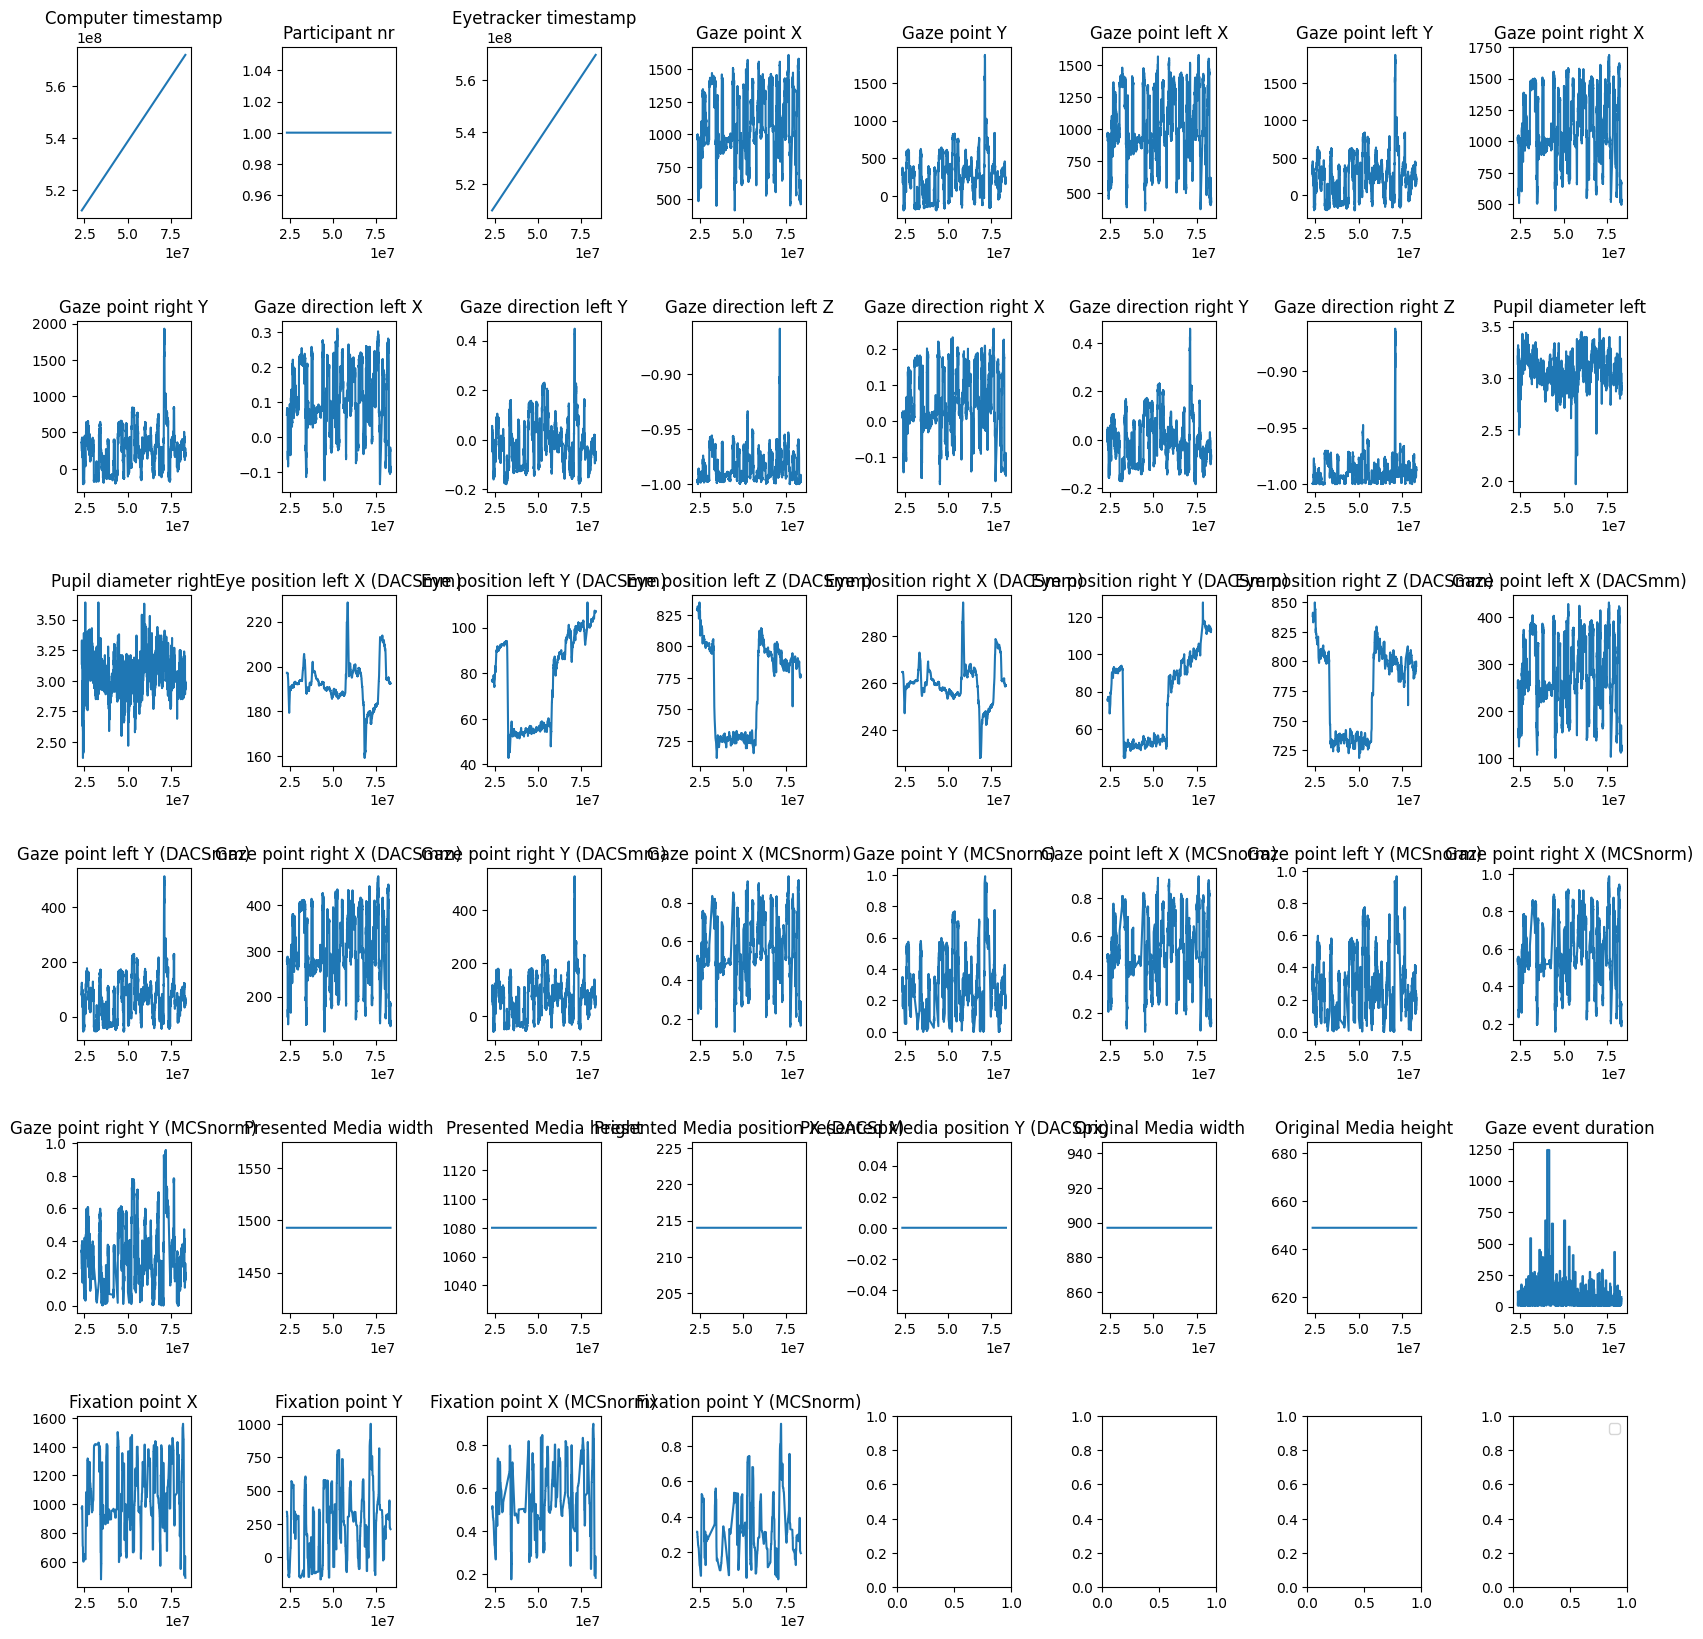

In [19]:
plot_timeseries(df_preprocessed)


After plotting the time-series graphs, I got to know we can delete the columns which have a constant graph with respect to the "Eyetracker timestamp", "Computer timestamp", "Recording timestamp" column as they do not provide any useful information.

In [20]:
#Identify constant columns
constant_cols = []
for col in df_preprocessed.columns:
    if col not in ["Eyetracker timestamp", "Computer timestamp", "Recording timestamp"]:
        if df_preprocessed[col].nunique() == 1:
            constant_cols.append(col)

#Drop constant columns from the DataFrame
df_preprocessed.drop(columns=constant_cols, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


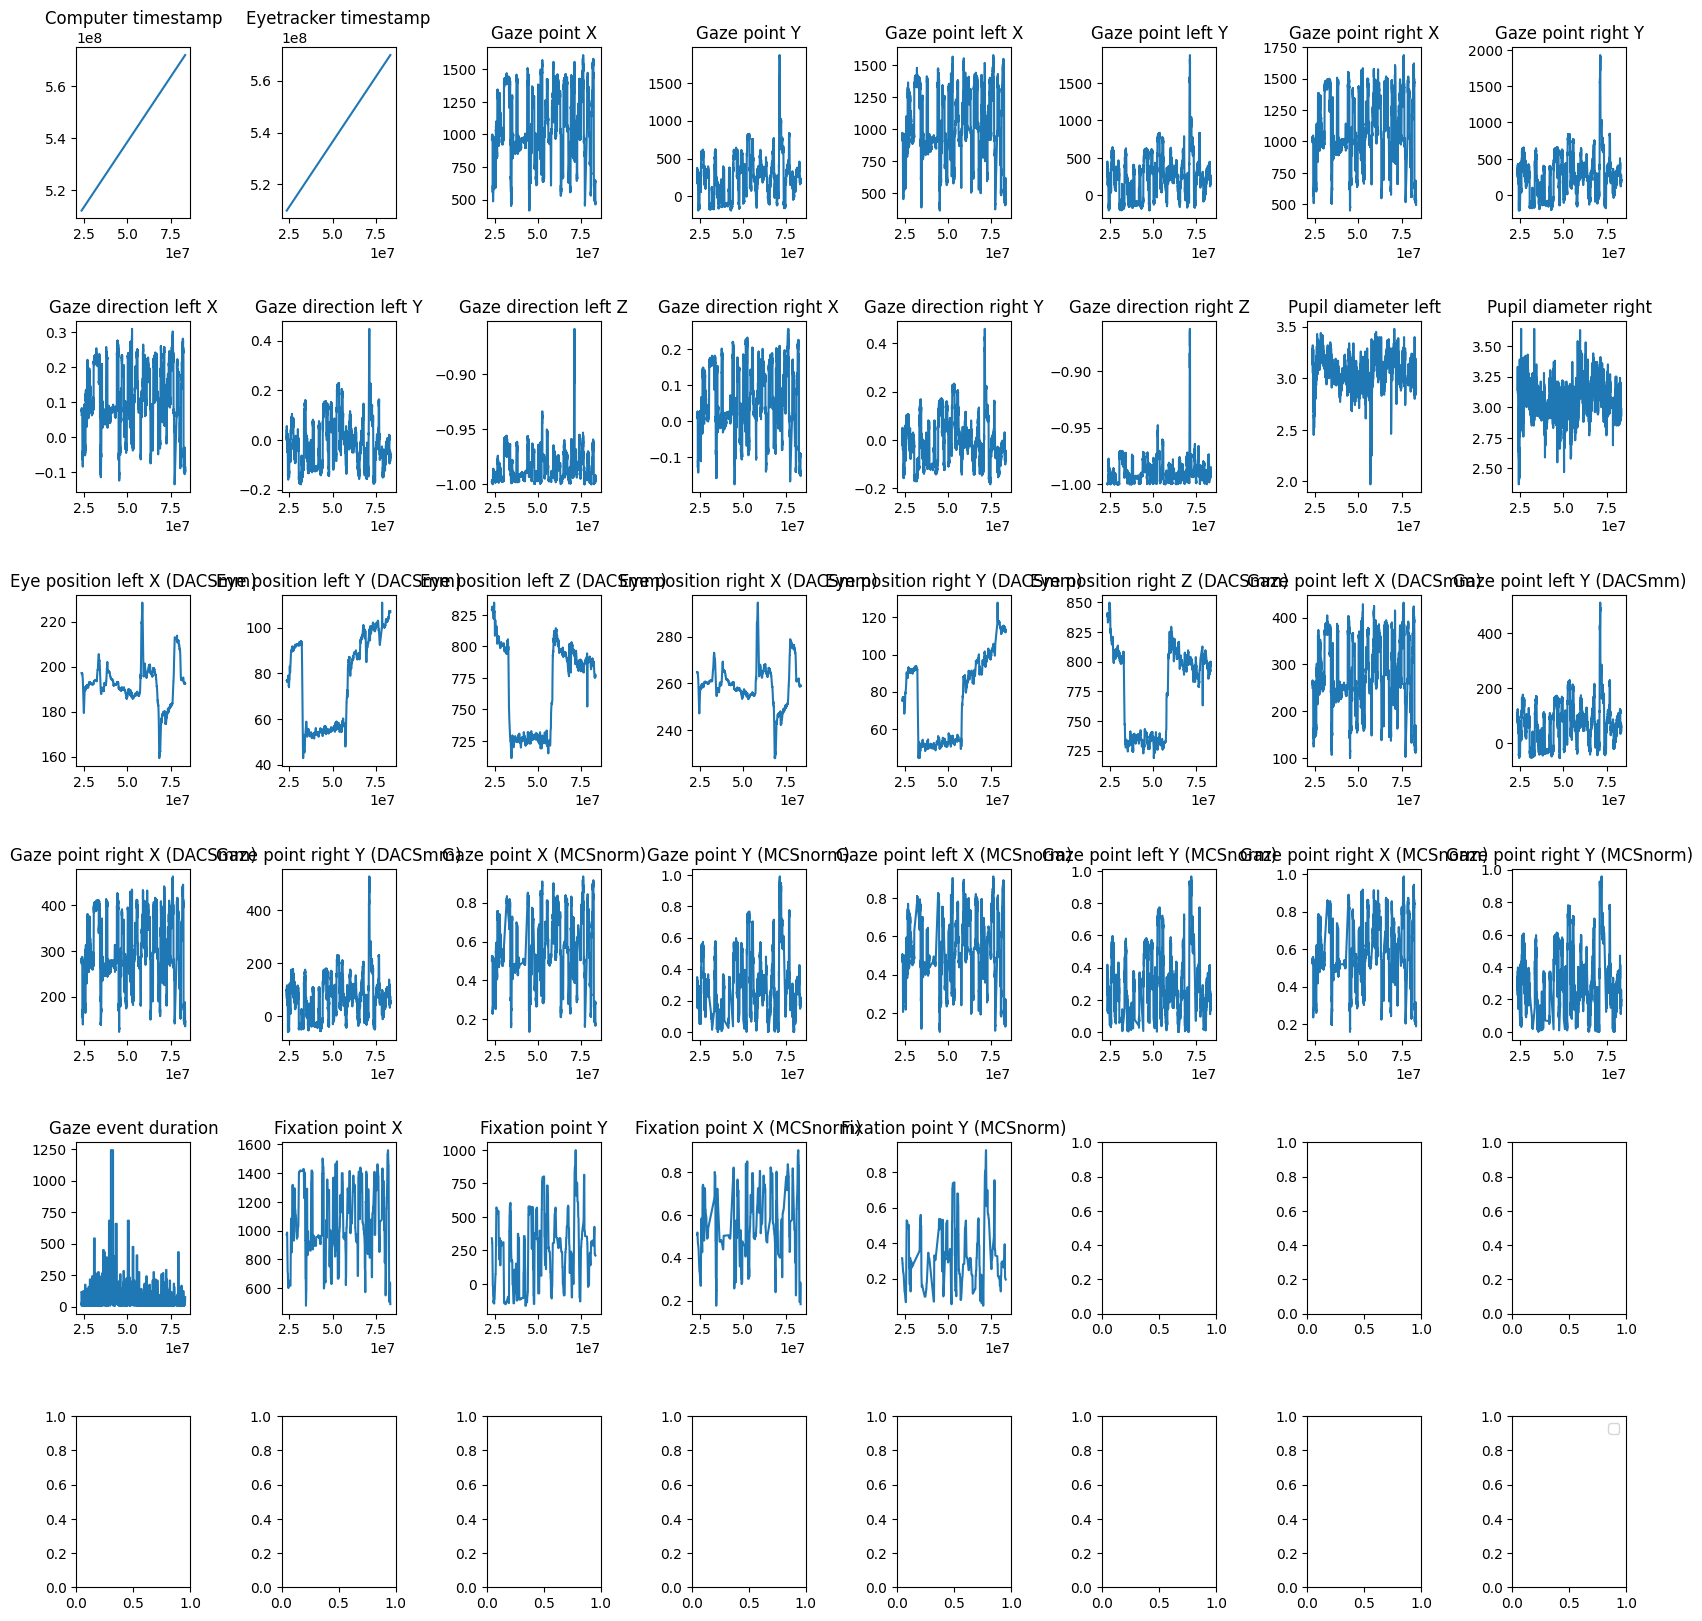

In [21]:
plot_timeseries(df_preprocessed)

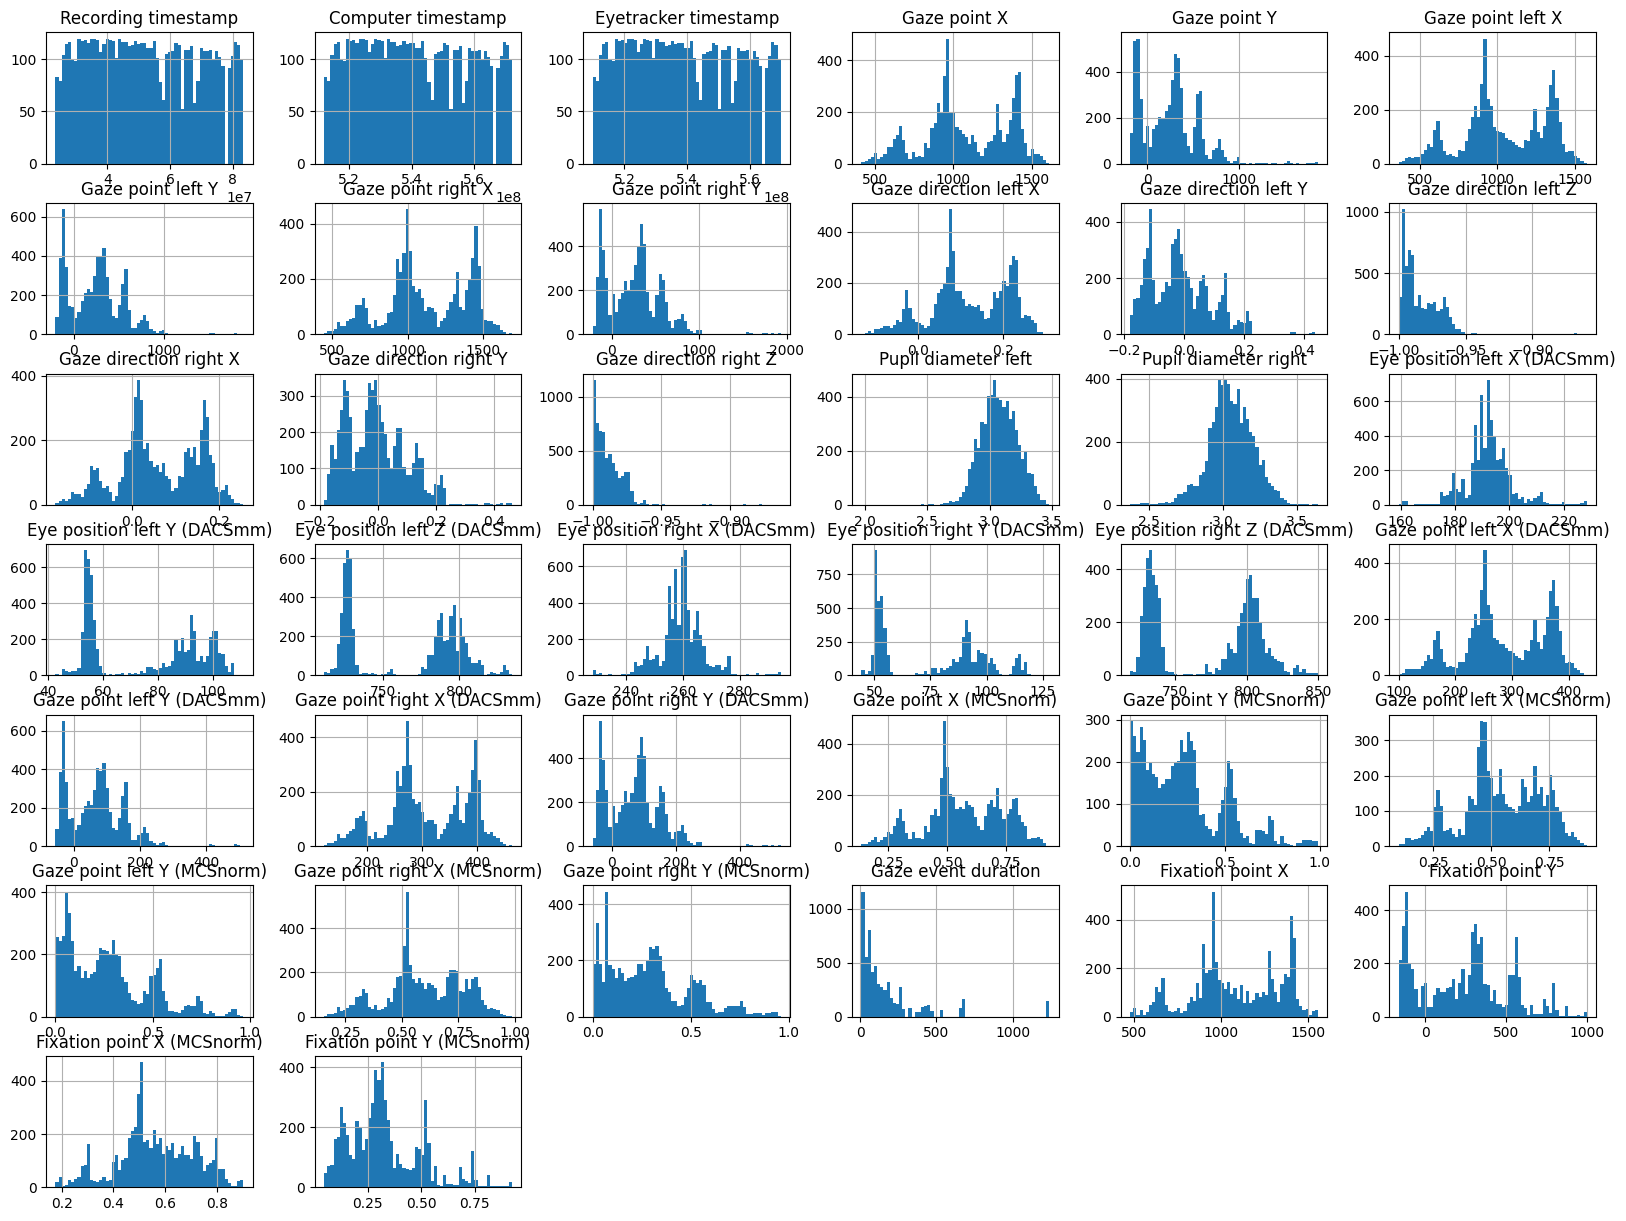

In [22]:
#Creating histogram plots for the columns in the DataFrame
df_preprocessed.hist(bins=60, figsize=(20, 15));

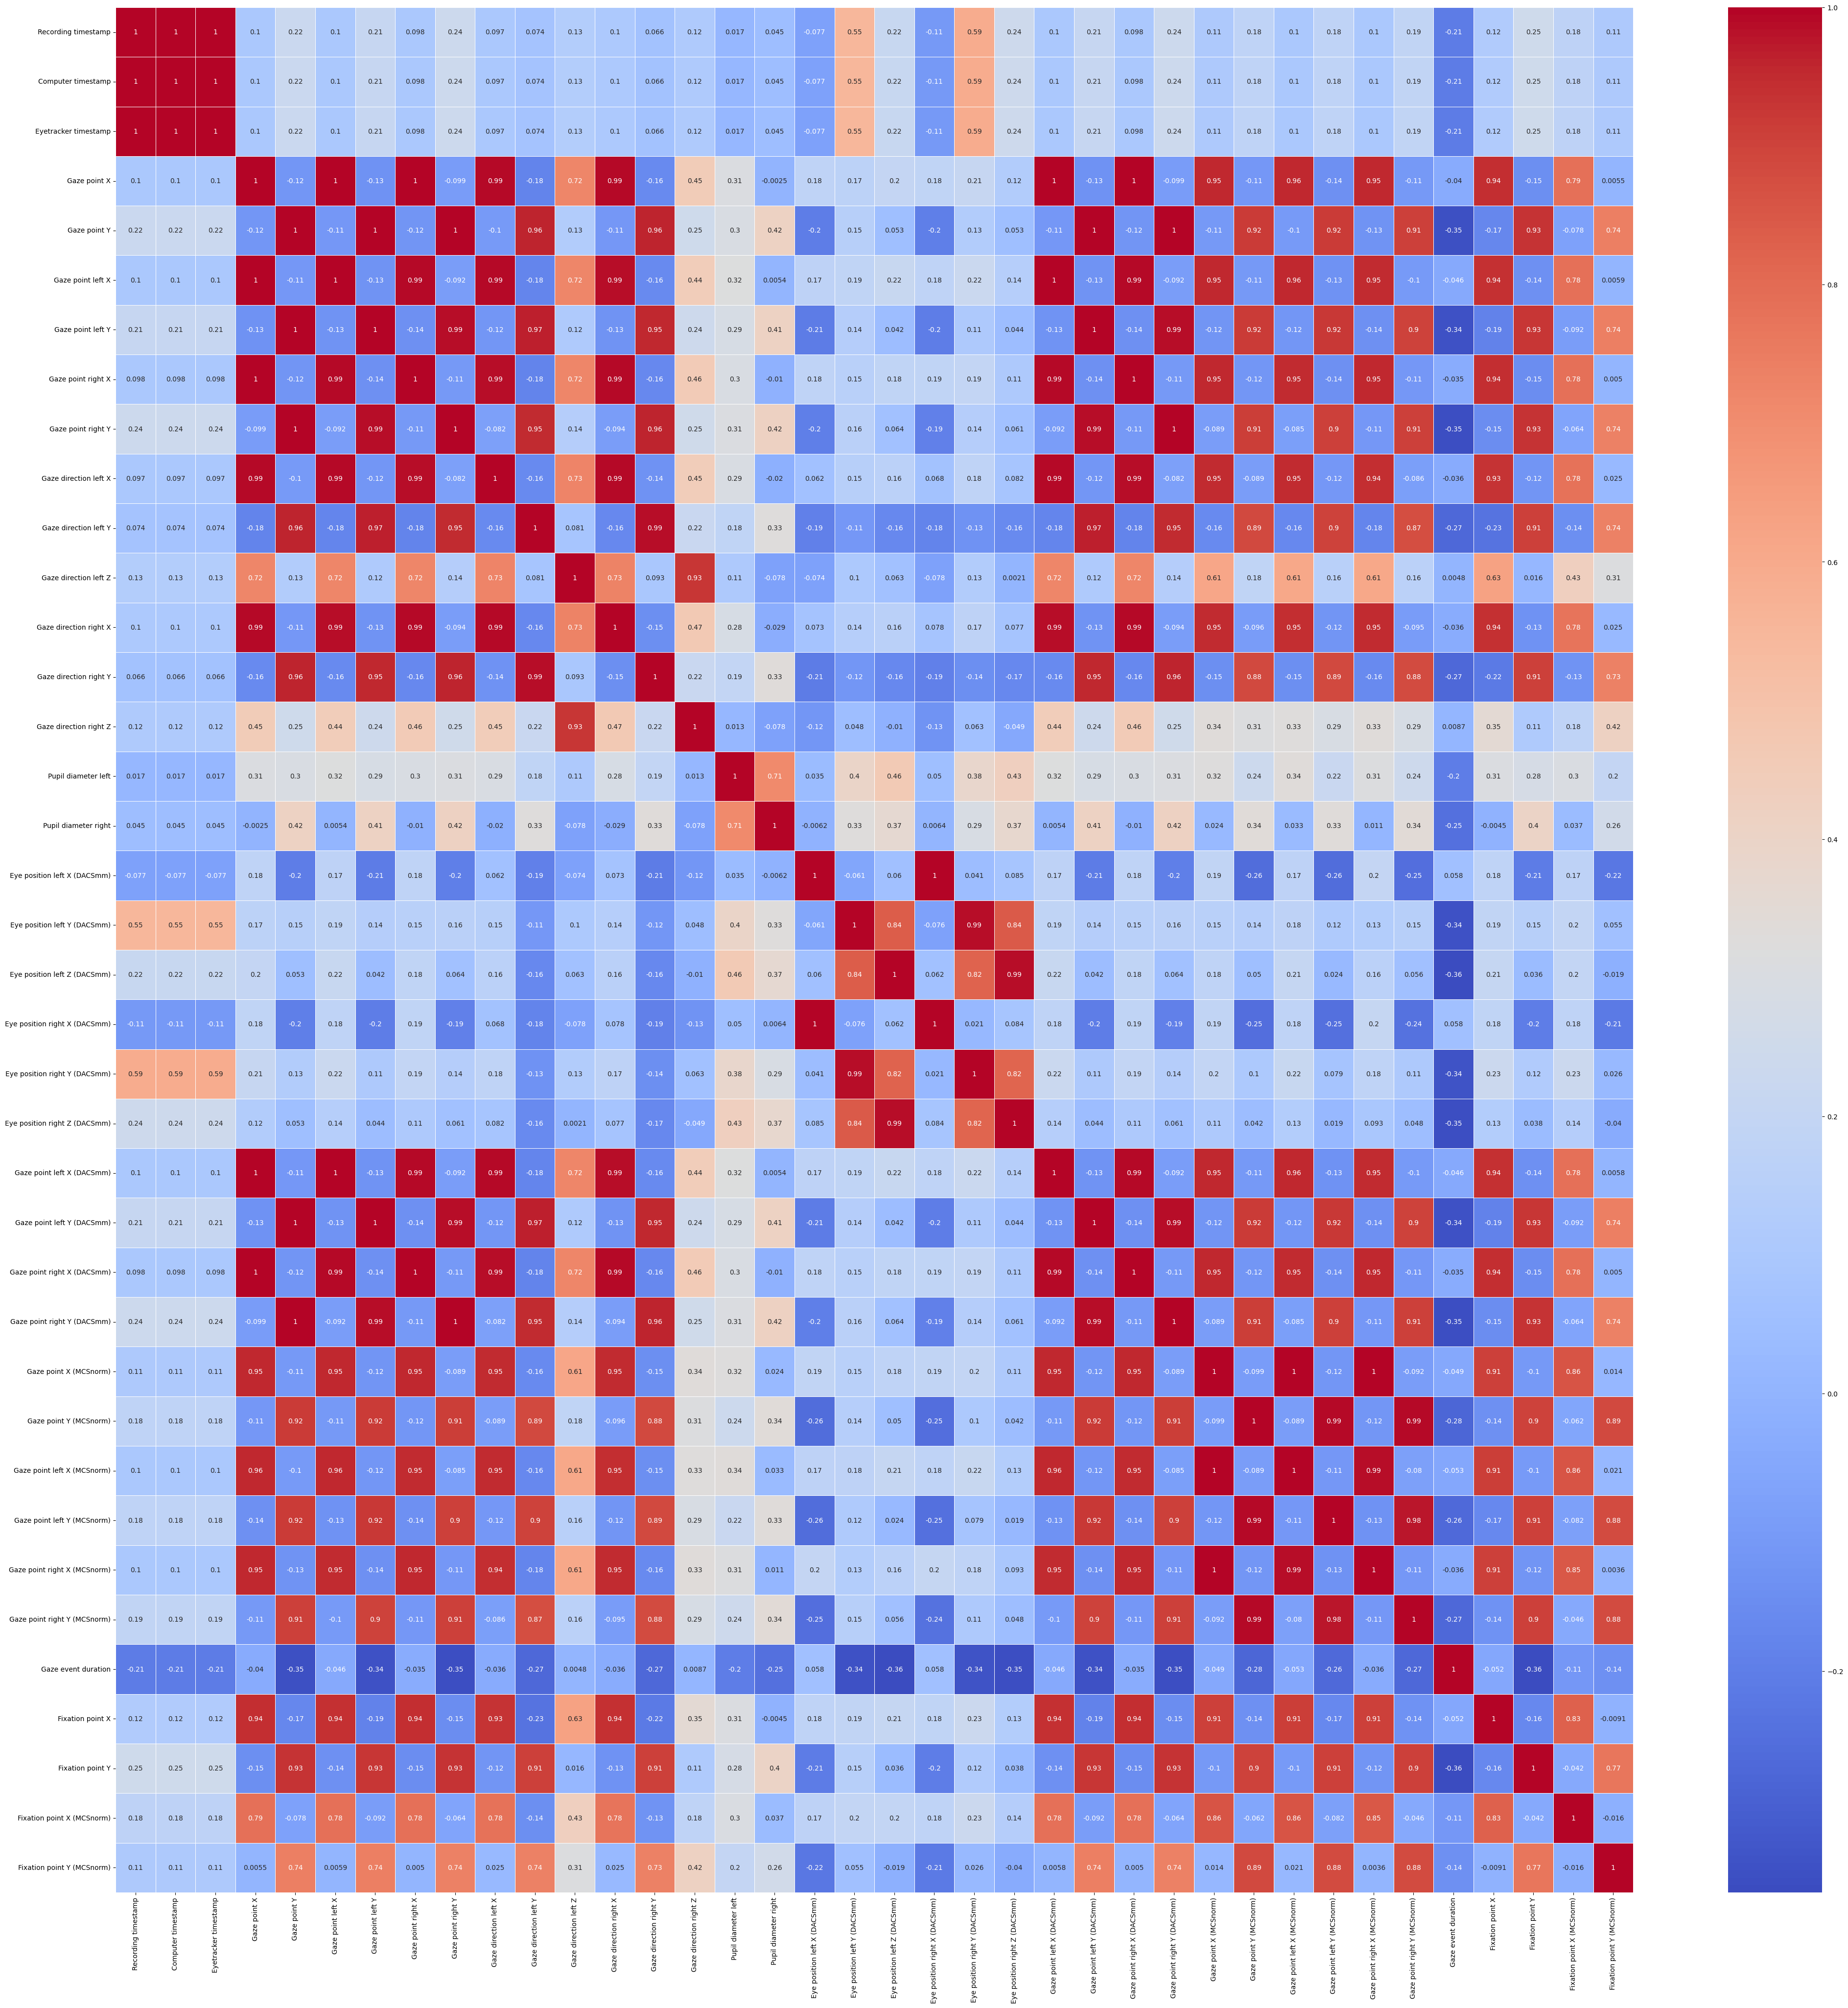

In [23]:
#correlation matrix for columns after preprocessing 
correlation_matrix = df_preprocessed.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.show()

Analyzing gaze behavior during tasks

Analyzing gaze behavior during tasks typically involves processing the raw eye tracker data to extract meaningful gaze metrics that can provide insights into the participant's visual attention patterns. Here are some common methods that can be used to analyze gaze behavior during tasks:

Fixation detection: Fixations are periods of stable gaze where the eyes are relatively stationary. Fixation detection algorithms can be used to identify fixations from raw gaze data, typically by setting thresholds for parameters such as gaze velocity or dispersion. Fixation duration, fixation count, and fixation locations can be calculated as metrics of gaze behavior.

Saccade detection: Saccades are rapid eye movements between fixations that are used to shift gaze from one location to another. Saccade detection algorithms can be used to identify saccades from raw gaze data, typically by detecting rapid changes in gaze position. Saccade amplitude, saccade duration, and saccade count can be calculated as metrics of gaze behavior.

In [24]:
# Extract gaze point X and Y coordinates
gaze_x = df_preprocessed['Gaze point X']
gaze_y = df_preprocessed['Gaze point Y']

# Define fixation and saccade threshold values
fixation_threshold = 30
saccade_threshold = 30 

# Initialize fixation and saccade lists
fixations = []
saccades = []

# Loop through the gaze data to detect fixations and saccades
for i in range(1, len(gaze_x)):
    # Calculate gaze velocity as the Euclidean distance between consecutive gaze points
    velocity = np.sqrt((gaze_x.iloc[i] - gaze_x.iloc[i-1]) ** 2 + (gaze_y.iloc[i] - gaze_y.iloc[i-1]) ** 2)
    # Check if the velocity falls below the fixation threshold, indicating a fixation
    if velocity < fixation_threshold:
        # Add the gaze point coordinates to the fixations list
        fixations.append((gaze_x.iloc[i], gaze_y.iloc[i]))
    # Check if the velocity exceeds the saccade threshold, indicating a saccade
    elif velocity > saccade_threshold:
        # Add the gaze point coordinates to the saccades list
        saccades.append((gaze_x.iloc[i], gaze_y.iloc[i]))

# Convert fixations and saccades to numpy arrays
fixations = np.array(fixations)
saccades = np.array(saccades)

print("fixations : ",fixations)
print()
print("saccades : ",saccades)

fixations :  [[972. 340.]
 [970. 323.]
 [977. 332.]
 ...
 [498. 221.]
 [482. 218.]
 [480. 213.]]

saccades :  [[989. 288.]
 [979. 336.]
 [990. 301.]
 ...
 [497. 213.]
 [467. 191.]
 [462. 201.]]


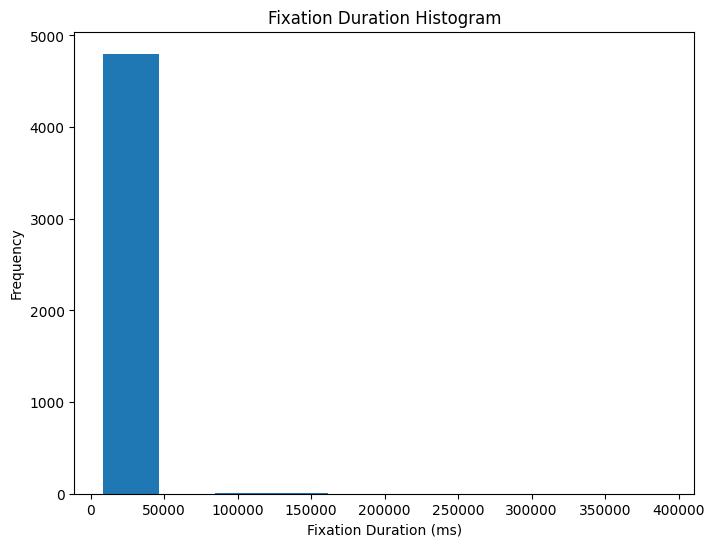

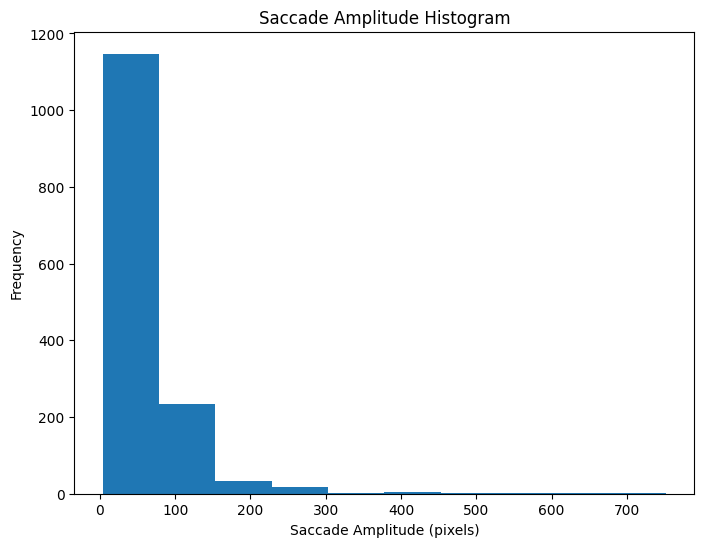

In [25]:
# Calculate fixation duration
fixation_durations = []
for i in range(len(fixations) - 1):
    fixation_duration = df_preprocessed['Recording timestamp'].iloc[i+1] - df_preprocessed['Recording timestamp'].iloc[i]
    fixation_durations.append(fixation_duration)

# Calculate saccade amplitude
saccade_amplitudes = []
for i in range(len(saccades) - 1):
    saccade_amplitude = np.sqrt((saccades[i+1][0] - saccades[i][0]) ** 2 + (saccades[i+1][1] - saccades[i][1]) ** 2)
    saccade_amplitudes.append(saccade_amplitude)

#print("fixation duration: ",fixation_duration)
#print("sccade amplitudes: ",saccade_amplitudes)

# Generate fixation duration histogram
plt.figure(figsize=(8, 6))
plt.hist(fixation_durations, bins=10)
#plt.figure(figsize=(10, 7))
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.title('Fixation Duration Histogram')
plt.show()

# Generate saccade amplitude histogram
plt.figure(figsize=(8, 6))
plt.hist(saccade_amplitudes, bins=10)
plt.xlabel('Saccade Amplitude (pixels)')
plt.ylabel('Frequency')
plt.title('Saccade Amplitude Histogram')
plt.show()

Heatmaps and scanpaths: Heatmaps and scanpaths are visual representations of gaze behavior during tasks. Heatmaps are created by aggregating gaze data into a 2D grid and calculating the density of fixations at each grid location, while scanpaths are the sequential order of fixations and saccades. Heatmaps and scanpaths can provide insights into areas of interest, gaze patterns, and exploration strategies during the tasks.

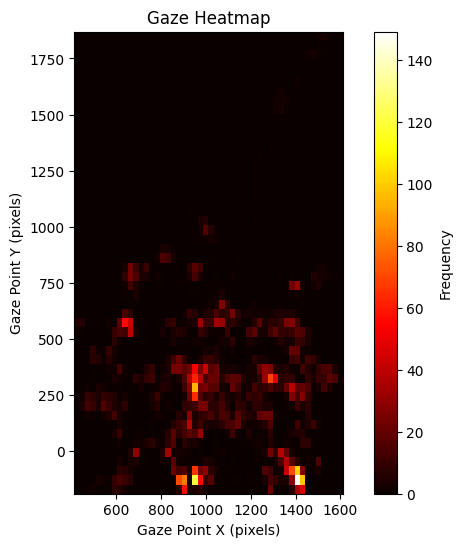

In [26]:
# Generate gaze heatmap
heatmap, xedges, yedges = np.histogram2d(gaze_x, gaze_y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig = plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
plt.colorbar(label='Frequency')
plt.xlabel('Gaze Point X (pixels)')
plt.ylabel('Gaze Point Y (pixels)')
plt.title('Gaze Heatmap')
plt.show()

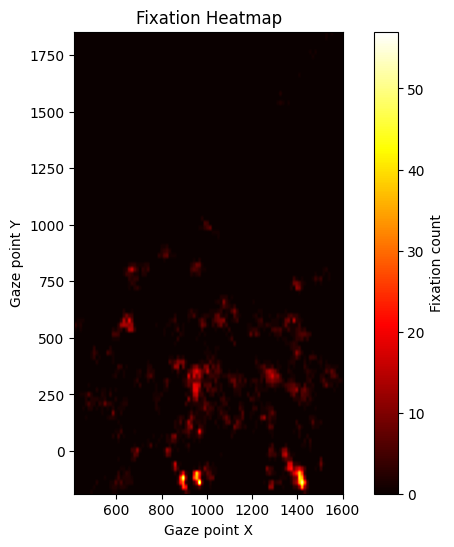

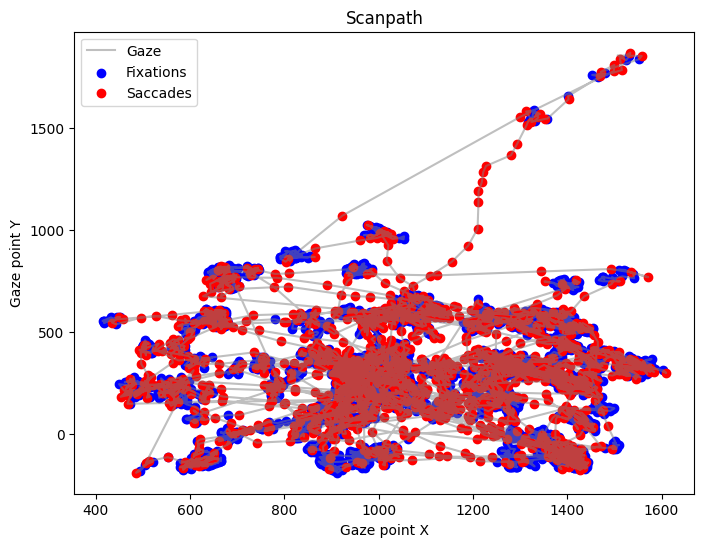

Fixation duration: 8315 fixations
Saccade amplitude: 11.180339887498949 pixels


In [27]:
# Generate a heatmap of fixations
heatmap, xedges, yedges = np.histogram2d(fixations[:, 0], fixations[:, 1], bins=(100, 100))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
plt.colorbar(label='Fixation count')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.title('Fixation Heatmap')
plt.show()

# Generate a scanpath plot of fixations and saccades
plt.figure(figsize=(8, 6))
plt.plot(gaze_x, gaze_y, color='gray', alpha=0.5, label='Gaze')
plt.scatter(fixations[:, 0], fixations[:, 1], color='blue', label='Fixations')
plt.scatter(saccades[:, 0], saccades[:, 1], color='red', label='Saccades')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.legend()
plt.title('Scanpath')
plt.show()

# Print analysis results
print('Fixation duration:', fixation_duration, 'fixations')
print('Saccade amplitude:', saccade_amplitude, 'pixels')

Understanding the significance of the signals from the data set and how they affect the model's prediction of empathy comes through data exploration.